# Jointure spatiale

#  fusion de dataframes

In [1]:
import pandas as pd
import geopandas

In [ ]:
ls data

In [4]:
# on suppose que l'on a un dossier data/ dans le répertoire courant
lesPays = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")

In [5]:
lesVilles = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [6]:
lesFleuves = geopandas.read_file("zip://./ne_50m_rivers_lake_centerlines.zip")

In [7]:
# on regarde les entêtes des colonnes
lesVilles.columns

Index(['name', 'geometry'], dtype='object')

In [14]:
# on peut sélectionner quelques villes
lesVilles[lesVilles['name'].isin(['London','Paris', 'Hanoi'])]

,name,geometry
144,Hanoi,POINT (105.84807 21.03527)
219,London,POINT (-0.11867 51.50194)
235,Paris,POINT (2.33139 48.86864)


In [ ]:
# on va vouloir sélection des villes selon le Pays et récupérer des informations communes
# pour faire un affichage "élaboré" à partir des deux séries, villes et pays

In [22]:
Liste = ['London','Paris', 'Bern', 'Brussels']
lesVilles2 = lesVilles[lesVilles['name'].isin(Liste)].copy()

In [23]:
lesVilles2

,name,geometry
26,Bern,POINT (7.46698 46.91668)
170,Brussels,POINT (4.33137 50.83526)
219,London,POINT (-0.11867 51.50194)
235,Paris,POINT (2.33139 48.86864)


In [24]:
# examinons la structure du fichier lesPays (qui concerne les continents et les pays)
lesPays.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [25]:
# en examinant le nom des colonnes/entête, je vois "iso_a3" comme étiquette intéressante
lesPays.columns

Index(['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry'], dtype='object')

In [26]:
# je fabrique une colonne supplémentaire avec une information cruciale pour relier les données
lesVilles2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [27]:
lesVilles2.columns

Index(['name', 'geometry', 'iso_a3'], dtype='object')

In [29]:
lesVilles2
# je dispose donc d'un jeu de données pour des villes avec l'info du pays où elles se trouvent

,name,geometry,iso_a3
26,Bern,POINT (7.46698 46.91668),CHE
170,Brussels,POINT (4.33137 50.83526),BEL
219,London,POINT (-0.11867 51.50194),GBR
235,Paris,POINT (2.33139 48.86864),FRA


In [30]:
# toujours un petit jeu de données mais sur les pays
lesPays2 = lesPays[['iso_a3', 'name', 'continent']].copy()

In [32]:
lesPays2.head()

,iso_a3,name,continent
0,AFG,Afghanistan,Asia
1,AGO,Angola,Africa
2,ALB,Albania,Europe
3,ARE,United Arab Emirates,Asia
4,ARG,Argentina,South America


In [33]:
# MAINTENANT je peux fusionner des données selon l'information sur l'id (iso_a3) du pays
lesVilles2.merge(lesPays2, on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


In [34]:
# RETENIR : pour fusionner deux dataframes, x, et y, il faut une CLE commune (ici iso_a3)

### On peut cependant trouver comment joindre ces deux ensembles 'villes' et 'pays' si on a l'information fournie par des objets géométriques
+ les villes sont des POINTS
+ les pays sont des (MULTI)-POLYGONES

+ within(POINT dans POLYGONE), contains (POLYGONE contient POINT), intersects (quand on a affaire à des LINESTRING

In [46]:
presquenFrance = lesPays.loc[ lesPays['name']=='France' , 'geometry'].squeeze()

In [48]:
type(presquenFrance)

shapely.geometry.multipolygon.MultiPolygon

In [49]:
# On obtient une série booleenne
filtre = lesVilles.within(presquenFrance)

In [50]:
lesVilles[filtre]

,name,geometry
10,Monaco,POINT (7.40691 43.73965)
13,Andorra,POINT (1.51649 42.50000)
186,Geneva,POINT (6.14003 46.21001)
235,Paris,POINT (2.33139 48.86864)


In [52]:
# c'est à dire
lesVilles[lesVilles.within(presquenFrance)]

,name,geometry
10,Monaco,POINT (7.40691 43.73965)
13,Andorra,POINT (1.51649 42.50000)
186,Geneva,POINT (6.14003 46.21001)
235,Paris,POINT (2.33139 48.86864)


In [53]:
# pour résumer ce que l'on a fait on peut relier deux jeux de données soit par une clé,
# soit par une opération géométrique grâce à un opérateur binaire (within, contains, intersects)

## Opération de jointure spatiale
Transférer les attributs d'une dataframe à l'autre en fonction de relation spatiale

+ il faut connaître, le geodataframe auquel on veut ajouter des informations
+ il faut connaître, le geodataframe qui contient les informations que l'on veut ajouter
+ il faut la relation spatiale pour faire correspondre les 2 ensembles de données
+ le type de "join" à effectuer

Ici on va utiliser la fonctionnalité `geopandas.sjoin`


In [ ]:
# on veut faire la jointure entre les villes et les pays sur la base de la relation
# spatiale existante

In [54]:
jointure = geopandas.sjoin(lesVilles, lesPays, op='within', how='left')

In [56]:
type(jointure)

geopandas.geodataframe.GeoDataFrame

In [57]:
jointure.columns

Index(['name_left', 'geometry', 'index_right', 'iso_a3', 'name_right',
       'continent', 'pop_est', 'gdp_md_est'],
      dtype='object')

In [61]:
# on note que c'est un fichier sur les villes 
jointure.head()

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8754413.0,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1467152.0,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,594130.0,58740.0


In [59]:
# avantages? par exemple pour savoir combien de villes par continent dans ces données

In [62]:
jointure['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

In [63]:
jointure[jointure['continent'] == 'Europe']

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8754413.0,416600.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,594130.0,58740.0
10,Monaco,POINT (7.40691 43.73965),55.0,FRA,France,Europe,67106161.0,2699000.0
13,Andorra,POINT (1.51649 42.50000),55.0,FRA,France,Europe,67106161.0,2699000.0
18,The Hague,POINT (4.26996 52.08004),117.0,NLD,Netherlands,Europe,17084719.0,870800.0
19,Ljubljana,POINT (14.51497 46.05529),150.0,SVN,Slovenia,Europe,1972126.0,68350.0
20,Bratislava,POINT (17.11698 48.15002),149.0,SVK,Slovakia,Europe,5445829.0,168800.0
22,Podgorica,POINT (19.26631 42.46597),106.0,MNE,Montenegro,Europe,642550.0,10610.0


In [64]:
# A Retenir : on sait fabriquer un nouveau jeu de données sur les villes grâce à une jointure spatiale

# Exercice avec les données sur Paris 

In [65]:
# on refait la même chose (en gros ) mais avec les données sur Paris et un peu plus de précisions

In [69]:
L = list()

In [70]:
type(L)

list

In [73]:
#quartiers = geopandas.geodataframe.GeoDataFrame()

In [78]:
quartiers = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)

In [83]:
#quartiers.crs

In [80]:
stationsVelo = geopandas.geodataframe.GeoDataFrame()
stationsVelo = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

In [82]:
#stationsVelo.crs

In [87]:
# je me renseigne sur le nom des colonnes du dataframe quartier
quartiers.columns

Index(['id', 'district_name', 'population', 'geometry'], dtype='object')

In [90]:
stationsVelo.columns

Index(['name', 'bike_stands', 'available_bikes', 'geometry'], dtype='object')

###  QUESTION 1
 Déterminons pour chaque station de vélo, dans quel quartier elle se trouve

In [88]:
jointure = geopandas.sjoin(stationsVelo, quartiers[['district_name', 'geometry']], op='within')

In [89]:
jointure.columns

Index(['name', 'bike_stands', 'available_bikes', 'geometry', 'index_right',
       'district_name'],
      dtype='object')

In [93]:
# on vérifie qu'on a augmenté les données sur le dataframe concernant les stations de velo
# remarquer que la géométrie du quartier n'est pas ajouté mais elle était nécessaire pour l'opération de jointure joins
jointure.head()

,name,bike_stands,available_bikes,geometry,index_right,district_name
0,14002 - RASPAIL QUINET,44,4,POINT (650791.111 6860114.328),52,Montparnasse
143,14112 - FAUBOURG SAINT JACQUES CASSINI,16,0,POINT (651406.382 6859738.689),52,Montparnasse
293,14033 - DAGUERRE GASSENDI,38,1,POINT (650694.991 6859723.873),52,Montparnasse
346,14006 - SAINT JACQUES TOMBE ISSOIRE,22,0,POINT (651327.035 6859441.637),52,Montparnasse
429,14111 - DENFERT-ROCHEREAU CASSINI,24,8,POINT (651261.351 6859926.893),52,Montparnasse


###  QUESTION 2

### on va ajouter des données ponctuelles pour faire une faire une carte de type choropleth (densité/couleur)

In [95]:
lesArbres = geopandas.read_file("data/paris_trees.gpkg")

In [96]:
lesArbres.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 0°E to 6°E - by country
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [99]:
quartiers = geopandas.read_file("data/paris_districts.geojson").to_crs(lesArbres.crs)

In [100]:
quartiers.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 0°E to 6°E - by country
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

###  QUESTION 3

On a besoin de procéder à une jointure, entre des localisations (les arbres) et des zones (les quartiers). 

On veut aussi connaître combien il y a d'arbres par quartiers

In [102]:
# examinons le fichier de données sur les arbres
lesArbres.columns

Index(['species', 'location_type', 'geometry'], dtype='object')

In [128]:
lesArbres.shape

(7856, 3)

In [103]:
lesArbres.head()

,species,location_type,geometry
0,Marronnier,Alignement,POINT (455834.122 5410780.606)
1,Marronnier,Alignement,POINT (446546.284 5412574.697)
2,Marronnier,Alignement,POINT (449768.283 5409876.557)
3,Marronnier,Alignement,POINT (451779.708 5409292.071)
4,Sophora,Alignement,POINT (447041.361 5409756.712)


In [134]:
# A nouveau, la jointure va utiliser "sjoin" de geopandas pour des POINTs avec des POLYGONs
jointure3 = geopandas.sjoin(lesArbres, quartiers, op='within')

In [136]:
jointure3

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476
...,...,...,...,...,...,...,...
5515,Platane,Alignement,POINT (451129.048 5413304.688),4,5,Gaillon,1345
7241,Pterocarya,Alignement,POINT (451267.252 5413339.433),4,5,Gaillon,1345
3706,Pterocarya,Alignement,POINT (451509.905 5413400.369),5,6,Vivienne,2917
6111,Erable,Alignement,POINT (451886.618 5412870.179),6,7,Mail,5783


In [137]:
# Calcul du nombre d'arbres dans chaque quartier à l'aide de l'instruction df.groupby('clé')
lesArbres_par_quartier = jointure3.groupby('district_name')

In [139]:
lesArbres_par_quartier

In [140]:
lesArbres_par_quartier.head()

,species,location_type,geometry,index_right,id,district_name,population
0,Marronnier,Alignement,POINT (455834.122 5410780.606),43,44,Sainte-Marguerite,36476
130,Micocoulier,Alignement,POINT (455458.848 5411310.443),43,44,Sainte-Marguerite,36476
142,Platane,Alignement,POINT (455704.681 5410991.067),43,44,Sainte-Marguerite,36476
402,Cedrele,Alignement,POINT (455538.223 5411112.314),43,44,Sainte-Marguerite,36476
428,Micocoulier,Alignement,POINT (455487.563 5411285.863),43,44,Sainte-Marguerite,36476
...,...,...,...,...,...,...,...
3897,Platane,Alignement,POINT (451102.185 5413298.002),4,5,Gaillon,1345
4987,Micocoulier,Alignement,POINT (451333.568 5413356.194),4,5,Gaillon,1345
3706,Pterocarya,Alignement,POINT (451509.905 5413400.369),5,6,Vivienne,2917
6111,Erable,Alignement,POINT (451886.618 5412870.179),6,7,Mail,5783


In [123]:
# je modifie
serieArbres_par_quartier = lesArbres_par_quartier.size()

In [124]:
type(serieArbres_par_quartier)

pandas.core.series.Series

In [148]:
serieArbres_par_quartier
# il ya 80 quartiers donc je vérifie bien la taille de la série fabriquée par regroupement
# sur les 391 entrées fournies par le fichier arbres traités par groupby

In [141]:
DF_lesArbres_par_quartier = serieArbres_par_quartier.to_frame(name='nombre_d_arbres')

In [147]:
DF_lesArbres_par_quartier

In [143]:
quartiers_et_arbres = pd.merge(quartiers, DF_lesArbres_par_quartier, on='district_name')

In [146]:
quartiers_et_arbres.head()

,id,district_name,population,geometry,nombre_d_arbres
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",40
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",40
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",4
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",7
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7


In [149]:
quartiers_et_arbres['nbrAbresSuperficie']= quartiers_et_arbres['nombre_d_arbres']\
                                                / quartiers_et_arbres.geometry.area

In [152]:
#quartiers_et_arbres.head()

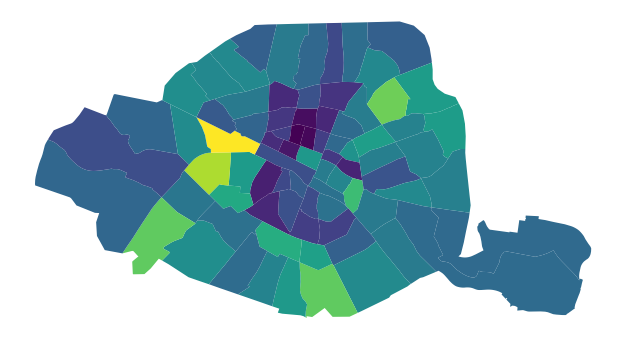

In [154]:
ax = quartiers_et_arbres.plot(column='nbrAbresSuperficie', figsize=(12,6))
ax.set_axis_off()

###  QUESTION 4 (Overlay)

Jusqu'à présent, on ne modifiait pas les objets géométriques suite aux opérations de jonction spatiale.

In [155]:
# On va considérer 2 dataframes avec des objets géométriques

In [156]:
lesPays = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")

In [157]:
afrique = lesPays[ lesPays['continent'] == 'Africa']

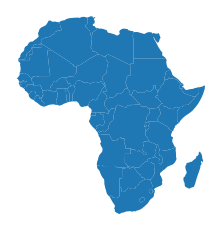

In [158]:
ax = afrique.plot()
ax.set_axis_off()

In [159]:
lesVilles['geometry'] = lesVilles.buffer(2)

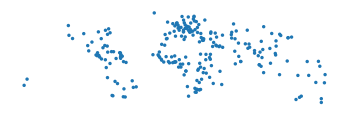

In [160]:
ax = lesVilles.plot()
ax.set_axis_off()

In [162]:
#lesVilles.head()

In [163]:
rep = geopandas.overlay(afrique, lesVilles, how='difference')

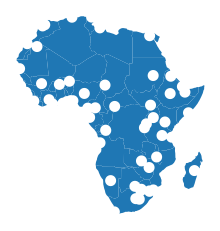

In [164]:
ax = rep.plot()
ax.set_axis_off()

###  QUESTION 5
 les espaces verts à Paris par quartier?

In [165]:
util_Sols = geopandas.read_file("zip://./data/paris_land_use.zip")

In [169]:
util_Sols.head()

,class,geometry
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345..."
1,Roads and associated land,"POLYGON ((3751390.345 2886000.000, 3751390.345..."
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.370..."
3,Roads and associated land,"POLYGON ((3751390.345 2887500.000, 3751390.345..."
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.370..."


In [171]:
#ax = util_Sols.plot(column='class', legend=True, figsize=(15,10))
#ax.set_axis_off()

In [182]:
util_Sols['superficie'] = util_Sols.geometry.area

In [183]:
# util_Sols --> mon dataframe de départ
aires1 = util_Sols.groupby('class')  # regroupement des aires

In [184]:
aires1

In [185]:
aires2 = aires1['superficie']  # une serie de la dataframe (1 colonne)
aires_totales = aires2.sum() / 1000*2

In [186]:
aires_totales

class
Continuous Urban Fabric             91886.180071
Discontinuous Dense Urban Fabric     7314.686511
Green urban areas                   19716.876901
Industrial, commercial, public      26590.083966
Railways and associated land         3871.586357
Roads and associated land           14803.148676
Sports and leisure facilities        7157.018516
Water bodies                         6379.411015
Name: superficie, dtype: float64

In [175]:
quartiers = geopandas.read_file("data/paris_districts.geojson").to_crs(util_Sols.crs)

In [187]:
boisDeBoulogne = util_Sols[util_Sols['class'] == "Green urban areas"].sort_values('superficie').geometry.iloc[-1]

In [189]:
quartierMuette = quartiers[quartiers.district_name == 'Muette'].geometry.squeeze()

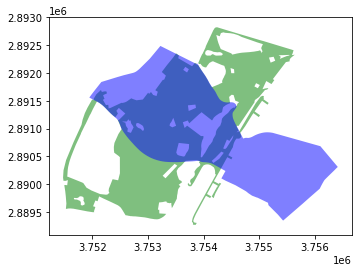

In [191]:
ax = geopandas.GeoSeries([boisDeBoulogne, quartierMuette]).plot(color=['green', 'blue'], alpha=0.5)

In [192]:
intersection = boisDeBoulogne.intersection(quartierMuette)

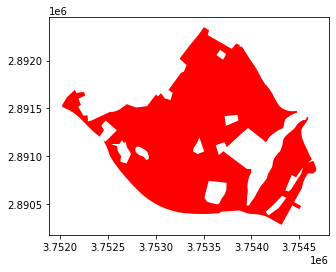

In [193]:
ax = geopandas.GeoSeries([intersection]).plot(color='red')

In [ ]:
# On voit ainsi la manière pour fabriquer de nouvelles données pour les objets géométriques.